<a href="https://colab.research.google.com/github/kurasaiteja/Whatsapp-Analysis/blob/master/Whatsapp_Group_Chat_Analysis_for_Android.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Whatsapp Group Chat Data Analysis using python.

Hey there! This a project which would keep evolving with time.

A typical data science project would involve 5 steps. The first step is Data Collection. In this case Data collection involves

Opening Whatsapp group chat.
Go to Settings.
Click on Export Chat.
Click on without media.

In [ ]:
!pip install emoji

In [ ]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
% matplotlib inline

In [ ]:
! git clone https://github.com/amueller/word_cloud.git
% cd word_cloud
! pip install .

Cloning into 'word_cloud'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 5773 (delta 33), reused 46 (delta 3), pack-reused 5667
Receiving objects: 100% (5773/5773), 105.93 MiB | 30.19 MiB/s, done.
Resolving deltas: 100% (3368/3368), done.
/content/word_cloud/word_cloud/word_cloud/word_cloud
Processing /content/word_cloud/word_cloud/word_cloud/word_cloud
  Created wheel for wordcloud: filename=wordcloud-1.6.0.post88+ge196d19-cp36-cp36m-linux_x86_64.whl size=338612 sha256=124ed7541fcf8bedb722cf00113bfd07bbf0eddef6b6a4d449660fccd265b079
  Stored in directory: /tmp/pip-ephem-wheel-cache-iqs9b9d3/wheels/4a/a2/76/e7f6c5039f8f8c93c078f38cedf6c90ee95019d9483f181ed7
Successfully built wordcloud
  Found existing installation: wordcloud 1.6.0.post88+ge196d19
    Uninstalling wordcloud-1.6.0.post88+ge196d19:
      Successfully uninstalled wordcloud-1.6.0.post88+ge196d19


# **Data Preparation:**


This plain text file will have to be parsed and tokenized in a meaningful manner in order to be served (stored) in a Pandas dataframe.

Let us consider just a single line from the text (which we will call “raw text”) and see how we can extract relevant columns from it:

18/06/17, 9:47 PM - Teja: Why do you have 2 numbers?

In our sample line of text, our main objective is to automatically break down the raw message into 4 tokens.

{Date}, {Time} - {Author}: {Message}

{18/06/17}, {9:47 PM} - {Teja}: {Why do you have 2 numbers?}






In [ ]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9][0-9]) (AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [ ]:
# def FindAuthor(s):
#     patterns = [
#         '([\w]+):',                        # First Name
#         '([\w]+[\s]+[\w]+):',              # First Name + Last Name
#         '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
#         '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India)
#         '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US)
#         '([\w]+)[\u263a-\U0001f999]+:',    # Name and Emoji              
#     ]
#     pattern = '^' + '|'.join(patterns)
#     result = re.match(pattern, s)
#     if result:
#         return True
#     return False

In [ ]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [ ]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message


In [ ]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = '/content/WhatsApp Chat with Blabla (1).txt' 
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

In [ ]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
df.head()

,Date,Time,Author,Message
0,2019-03-07,6:45 PM,None,"Aakarsh Yelisetty created group ""Blabla"""
1,2019-04-01,7:33 PM,None,Aakarsh Yelisetty added you
2,2019-04-01,7:40 PM,Manikanta,Hello hackers 👨🏻‍💻👨🏻‍💻
3,2019-04-01,7:43 PM,Manikanta,"Em ina pedthe, topper ga.. Hacker ga.. Racha l..."
4,2019-04-01,7:43 PM,Manikanta,Roll back


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35043 entries, 0 to 35042
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     35043 non-null  datetime64[ns]
 1   Time     35043 non-null  object        
 2   Author   34795 non-null  object        
 3   Message  35043 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.1+ MB


## Printing Participants

In [ ]:
df.Author.unique()

array([None, 'Manikanta', 'Aakarsh Yelisetty', 'Vishal Gurrala',
       'Gowtham Bujjam', 'Teja Kura'], dtype=object)

**None** which is the first element in array indicates few messages which do not have authors like,


*   Group was created.
*   Teja was added and so on.



Let us remove the messages created by None

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34795 entries, 2 to 35042
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     34795 non-null  datetime64[ns]
 1   Time     34795 non-null  object        
 2   Author   34795 non-null  object        
 3   Message  34795 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.3+ MB


In [ ]:
df.Author.unique()

array(['Manikanta', 'Aakarsh Yelisetty', 'Vishal Gurrala',
       'Gowtham Bujjam', 'Teja Kura'], dtype=object)

We successfully removed None author.

# Group Wise Stats.

In [ ]:
total_messages = df.shape[0]
print(total_messages)

34795


Let us now find out the total Media Messages

In [ ]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)

2926


In [ ]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

df["emoji"] = df["Message"].apply(split_count)

In [ ]:
emojis = sum(df['emoji'].str.len())
print(emojis)

6214


In [ ]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()


In [ ]:
links = np.sum(df.urlcount)

In [ ]:
print("Group Wise Stats")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

Group Wise Stats
Messages: 34795
Media: 2926
Emojis: 6214
Links: 88


## Let us Separate the media messages and text messages

In [ ]:
media_messages_df = df[df['Message'] == '<Media omitted>']

In [ ]:
messages_df = df.drop(media_messages_df.index)

In [ ]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31869 entries, 2 to 35042
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      31869 non-null  datetime64[ns]
 1   Time      31869 non-null  object        
 2   Author    31869 non-null  object        
 3   Message   31869 non-null  object        
 4   emoji     31869 non-null  object        
 5   urlcount  31869 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.7+ MB


It might be interesting to count the number of letters and words used by each author in each message. So, let us add 2 new columns to the data frame called “Letter_Count” and “Word_Count”, using the following code:

In [ ]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

In [ ]:
messages_df.head()

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount
2,2019-04-01,7:40 PM,Manikanta,Hello hackers 👨🏻‍💻👨🏻‍💻,"[👨🏻‍💻, 👨🏻‍💻]",0,22,3,1
3,2019-04-01,7:43 PM,Manikanta,"Em ina pedthe, topper ga.. Hacker ga.. Racha l...",[],0,72,12,1
4,2019-04-01,7:43 PM,Manikanta,Roll back,[],0,9,2,1
5,2019-04-01,7:43 PM,Manikanta,Ventane anni delete chesi dengude,[],0,33,5,1
6,2019-04-01,7:43 PM,Aakarsh Yelisetty,😂,[😂],0,1,1,1


In [ ]:
messages_df["emojicount"]= df['emoji'].str.len()

#Author wise stats

In [ ]:
# Creates a list of unique Authors - ['Manikanta', 'Teja Kura', .........]
l = messages_df.Author.unique()

for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)   
  print()

Stats of Manikanta -
Messages Sent 5197
Words per message 4.247450452183952
Media Messages Sent 392
Emojis Sent 1107
Links Sent 9

Stats of Aakarsh Yelisetty -
Messages Sent 5033
Words per message 3.8221736538843634
Media Messages Sent 592
Emojis Sent 1292
Links Sent 35

Stats of Vishal Gurrala -
Messages Sent 8952
Words per message 3.371313672922252
Media Messages Sent 502
Emojis Sent 1306
Links Sent 26

Stats of Gowtham Bujjam -
Messages Sent 5561
Words per message 2.8194569322064376
Media Messages Sent 743
Emojis Sent 1744
Links Sent 1

Stats of Teja Kura -
Messages Sent 7126
Words per message 3.9400785854616895
Media Messages Sent 697
Emojis Sent 765
Links Sent 17



# Most used Emoji in Group

# Emoji Stats

### Unique emojis used in group

In [ ]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

185


### Most used emoji

In [ ]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
print(emoji_dict)

[('😂', 2519), ('🤣', 1326), ('\U0001f97a', 368), ('😒', 208), ('🔥', 74), ('🙄', 72), ('😞', 63), ('🤦🏻\u200d♂', 58), ('\U0001f973', 54), ('🤙🏻', 46), ('🤕', 44), ('😪', 44), ('😭', 42), ('🙂', 42), ('🤧', 40), ('😢', 40), ('😮', 39), ('😅', 35), ('🤦🏻\u200d♂️', 35), ('😨', 32), ('😔', 32), ('😏', 31), ('🙃', 30), ('😕', 30), ('😎', 29), ('\U0001f975', 27), ('😱', 26), ('🤥', 24), ('🤢', 23), ('💥', 22), ('🙏', 21), ('😁', 19), ('😆', 19), ('👏🏻', 18), ('\U0001f928', 18), ('😖', 18), ('\U0001f92f', 18), ('😑', 17), ('😣', 17), ('🙏🏻', 17), ('👍🏻', 16), ('☹️', 16), ('😟', 15), ('😳', 15), ('🤷🏻\u200d♂', 14), ('🍃', 13), ('\U0001f974', 13), ('😲', 12), ('\U0001f929', 11), ('\U0001f971', 11), ('🕺🏻', 10), ('😍', 10), ('😓', 10), ('😤', 9), ('😐', 9), ('\U0001f970', 9), ('😴', 9), ('🤷🏻\u200d♂️', 9), ('🤔', 8), ('🤐', 8), ('\U0001f92e', 8), ('👍', 8), ('🍻', 8), ('\U0001f9d0', 8), ('😦', 8), ('😶', 7), ('👀', 7), ('😬', 7), ('😡', 7), ('👗', 7), ('🙁', 7), ('💯', 7), ('🙆🏻\u200d♂', 6), ('\U0001f92d', 6), ('😹', 6), ('😇', 6), ('\U0001f9b8\u200d♂️', 6

In [ ]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

,emoji,count
0,😂,2519
1,🤣,1326
2,🥺,368
3,😒,208
4,🔥,74
...,...,...
180,👋,1
181,😗,1
182,🤗,1
183,🍀,1


We can see '😂 '   dominates the list.

### Emoji distribution visualisation

In [ ]:
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Person Wise Emoji Distribution

In [ ]:
# Creates a list of unique Authors - ['Manikanta', 'Teja Kura', .........]
l = messages_df.Author.unique()
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  total_emojis_list = list([a for b in dummy_df.emoji for a in b])
  emoji_dict = dict(Counter(total_emojis_list))
  emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
  print('Emoji Distribution for', l[i])
  author_emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
  fig = px.pie(author_emoji_df, values='count', names='emoji')
  fig.update_traces(textposition='inside', textinfo='percent+label')
  fig.show()

Emoji Distribution for Manikanta


Emoji Distribution for Aakarsh Yelisetty


Emoji Distribution for Vishal Gurrala


Emoji Distribution for Gowtham Bujjam


Emoji Distribution for Teja Kura


# Some more Stats

### **Day wise Distribution**

In [ ]:
def f(i):
  l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return l[i];
day_df=pd.DataFrame(messages_df["Message"])
day_df['day_of_date'] = messages_df['Date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(f)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)

In [ ]:
fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=False
)
fig.show()

### **Number of messages as times move on**

In [ ]:
date_df = messages_df.groupby("Date").sum()
date_df.reset_index(inplace=True)
fig = px.line(date_df, x="Date", y="MessageCount")
fig.update_xaxes(nticks=20)
fig.show()

### **Chatter**

In [ ]:
auth = messages_df.groupby("Author").sum()
auth.reset_index(inplace=True)
fig = px.bar(auth, y="Author", x="MessageCount", color='Author', orientation="h",
             color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"],
             title="Explicit color sequence"
            )

fig.show()

### **When are the group members most active?**

Text(0, 0.5, 'Time')

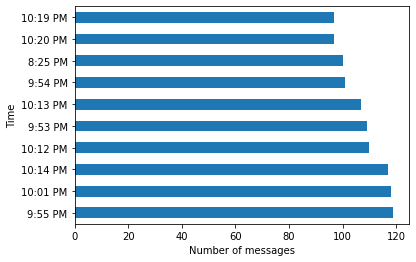

In [ ]:
messages_df['Time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Time')

### **The most happening day was -**

2019-07-26    720
2020-06-26    458
2020-04-06    436
2019-08-18    433
2019-08-12    408
             ... 
2019-09-09      1
2019-06-05      1
2019-11-03      1
2019-04-28      1
2019-04-15      1
Name: Date, Length: 375, dtype: int64


Text(0, 0.5, 'Date')

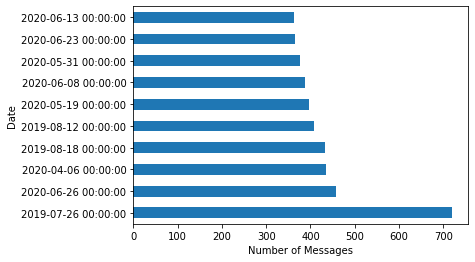

In [ ]:
messages_df['Date'].value_counts().head(10).plot.barh()
print(messages_df['Date'].value_counts())
plt.xlabel('Number of Messages')
plt.ylabel('Date')

### **The early bird**

### The Late Owl

### **Message Having Maximum number of words**

In [ ]:
messages_df.iloc[messages_df['Word_Count'].argmax()]

Date                                          2020-03-19 00:00:00
Time                                                     11:02 AM
Author                                          Aakarsh Yelisetty
Message         *Since, you are working from home, forwarding ...
emoji                                                          []
urlcount                                                       30
Letter_Count                                                 4907
Word_Count                                                    592
MessageCount                                                    1
emojicount                                                      0
Name: 17225, dtype: object

### **Word Cloud**

In [ ]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))

There are 672256 words in all the messages.


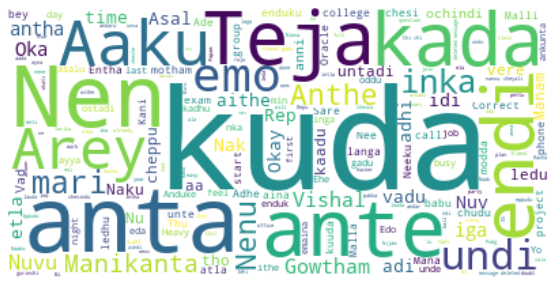

In [ ]:
  stopwords = set(STOPWORDS)
  stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","la","eh","ne","le","ni","lo","Ma","Haa","ni"])
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

Author name Manikanta


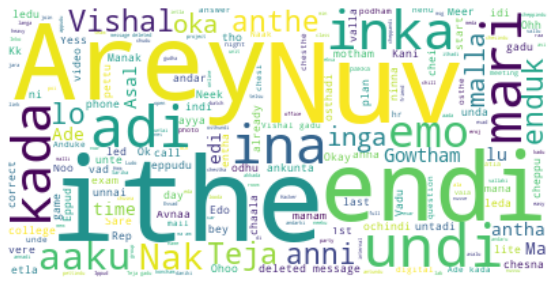

Author name Aakarsh Yelisetty


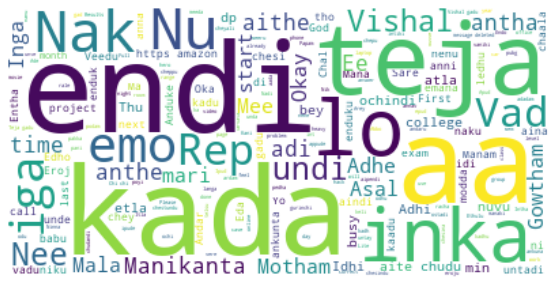

Author name Vishal Gurrala


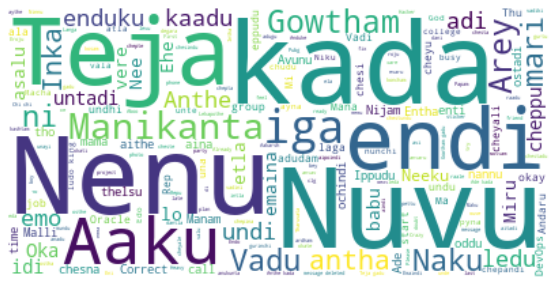

Author name Gowtham Bujjam


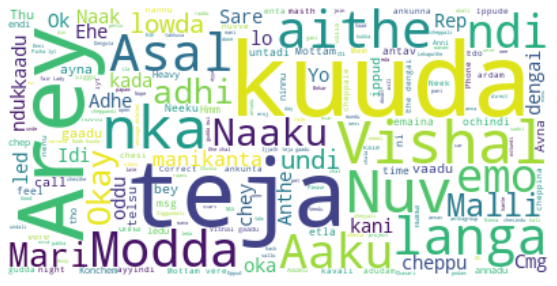

Author name Teja Kura


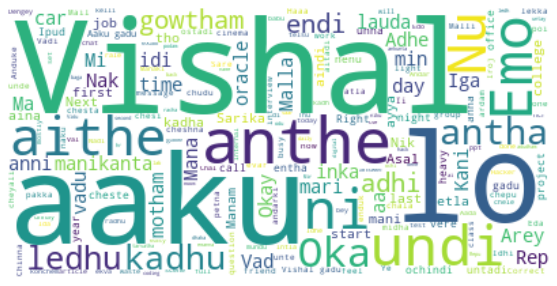

In [ ]:
l = messages_df.Author.unique()
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","anta","kuda","ante","la","eh","Nen","ne","haa","Haa","le"])
  # Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [ ]:
""

''